#  Parkinsons Data Analysis and Predictive Diagnosis
- Date:  9/27/2024
- Author:  Bill Louer
- Datasource:  https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/data

<img src='https://www.labiotech.eu/wp-content/uploads/2018/10/axovant-parkinsons-disease-motor-symptoms.jpg' alt="Parkinsons Image" width="400" height="300" >
Parkinsons Disease - Physical Symptoms  

Image Credit:  https://www.labiotech.eu/trends-news/axovant-parkinsons-disease-gene/?nab=0

##  Table of Contents
1.  [Project Overview](#section-1) 
2.  [Data Input](#section-2)
3.  [Data Cleaning](#section-3)
4.  [Exploratory Data Analysis](#section-4)
5.  [Feature Engineering](#section-5)
6.  [Modeling and Evaluation](#section-6)
7.  [Findings and Conclusions](#section-7)

##  1. Project Overview <a class="anchor" id="section-1"></a>

###  Objectives:  
-  Analyze the parksinsons data set to understand the distribution and relationships between feature variables and a target variable.
-  The target variable in this dataset is a diagnosis indicator of whether a patient was diagnosed with parkinsons.
-  Develop models and compare the performance of them to determine the most accurate and appropriate models.

#### Dataset source:  https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/data
##### Data Contents:
<p>This dataset comprises comprehensive health information for 2,105 patients diagnosed with Parkinson's Disease, each uniquely identified with IDs ranging from 3058 to 5162. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis indicator. This dataset is valuable for researchers and data scientists aiming to explore factors associated with Parkinson's Disease, develop predictive models, and conduct statistical analyses. </p>
<p>The dataset includes additional data in the following categories.</p> 

-  Patient Information
-  Patient ID
-  Demographic Details
-  Lifestyle Factors
-  Medical History
-  Clinical Measurements
-  Cognitive and Functional Assessments
-  Symptoms
-  Diagnosis Information
-  Confidential Information
 Information

In [1]:
#  import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import math

In [2]:
# Set pandas display precision for floats
pd.set_option('display.precision', 4)  # Set to 4 decimal places

## 2. Data Input <a class="anchor" id="section-2"></a>

In [3]:
df_parkinsons = pd.read_csv('../data/raw/parkinsons_disease_data.csv')

In [4]:
df_parkinsons.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.6199,0,5.1082,1.3807,3.8940,...,1.5724,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.2473,1,6.0276,8.4098,8.5134,...,4.7876,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.3682,0,2.2421,0.2133,6.4988,...,2.1307,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.4546,0,5.9978,1.3750,6.7150,...,3.3913,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.6160,0,9.7752,1.1886,4.6576,...,3.2010,0,0,0,1,0,1,0,0,DrXXXConfid


In [5]:
display(df_parkinsons.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

None

## 3.  Data Cleaning <a class="anchor" id="section-3"></a>

In [6]:
#  No null values
print('Columns with count of NaN values:')
df_parkinsons.isna().sum()

Columns with count of NaN values:


PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [7]:
duplicated_rows = df_parkinsons.duplicated().sum()
print('Number of duplicate rows:', duplicated_rows )

Number of duplicate rows: 0


## 4. Exploratory Data Analysis <a class="anchor" id="section-4"></a>

In [8]:
#  What is the distribution of the target variable?
df_parkinsons['Diagnosis'].value_counts()

Diagnosis
1    1304
0     801
Name: count, dtype: int64

In [9]:
df_parkinsons.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2.1050e+03,...,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000,2105.0000
mean,4110.0000,69.6019,0.4926,0.6926,1.3373,27.2095,0.2964,10.0404,5.0167,4.9129e+00,...,15.0943,4.9897,0.4318,0.2527,0.2076,0.1387,0.2950,0.2451,0.2969,0.6195
std,607.8055,11.5945,0.5001,1.0038,0.8958,7.2081,0.4568,5.6870,2.8909,2.8721e+00,...,8.6430,2.9339,0.4954,0.4347,0.4057,0.3457,0.4562,0.4303,0.4570,0.4856
min,3058.0000,50.0000,0.0000,0.0000,0.0000,15.0083,0.0000,0.0022,0.0042,1.0538e-05,...,0.0212,0.0015,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3584.0000,60.0000,0.0000,0.0000,1.0000,20.7822,0.0000,5.1503,2.4557,2.4785e+00,...,7.5172,2.4159,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,4110.0000,70.0000,0.0000,0.0000,1.0000,27.1846,0.0000,10.0703,5.0316,4.8252e+00,...,14.9636,4.9832,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,4636.0000,80.0000,1.0000,1.0000,2.0000,33.4625,1.0000,14.8296,7.5128,7.3815e+00,...,22.6084,7.4842,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000
max,5162.0000,89.0000,1.0000,3.0000,3.0000,39.9999,1.0000,19.9889,9.9953,9.9959e+00,...,29.9701,9.9927,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [10]:
df_parkinsons.describe(include='object')

,DoctorInCharge
count,2105
unique,1
top,DrXXXConfid
freq,2105


In [11]:
columns = list(df_parkinsons.columns[1:34])

In [12]:
df_parkinsons[columns]

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.6199,0,5.1082,1.3807,3.8940,9.2832,...,29.1813,1.5724,1,0,0,0,0,0,0,0
1,75,0,0,2,16.2473,1,6.0276,8.4098,8.5134,5.6025,...,12.3326,4.7876,0,1,0,1,0,1,0,1
2,70,1,0,0,15.3682,0,2.2421,0.2133,6.4988,9.9298,...,29.9278,2.1307,1,0,0,0,1,0,1,1
3,52,0,0,0,15.4546,0,5.9978,1.3750,6.7150,4.1962,...,21.3043,3.3913,1,1,1,0,0,0,1,1
4,87,0,0,1,18.6160,0,9.7752,1.1886,4.6576,9.3639,...,8.3364,3.2010,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,87,1,0,2,38.4838,0,12.6744,5.3259,5.9473,6.2962,...,28.6340,8.0763,1,0,0,0,1,1,0,0
2101,67,0,0,1,33.6944,1,0.9770,0.1086,4.8252,6.3423,...,13.1065,1.6658,0,0,0,1,0,1,1,1
2102,65,0,0,2,22.8296,0,6.1523,5.7751,0.3342,9.7400,...,26.5277,4.7856,0,0,0,0,1,1,0,1
2103,61,1,0,0,16.8710,1,0.2921,2.2805,9.5985,8.2894,...,19.8734,8.3790,1,0,1,0,0,1,1,1


In [13]:
#  Create dataframes with categorical data and with continous data
df_categorical = df_parkinsons.loc[:,df_parkinsons.nunique() < 6]
cat_columns = df_categorical.iloc[:, :-1].columns
df_continuous = df_parkinsons.loc[:,df_parkinsons.nunique() >= 6]
cont_columns = df_continuous.columns

In [14]:
df_continuous.loc[:, 'Diagnosis'] = df_parkinsons['Diagnosis']
df_continuous.head()

C:\Users\Bill\AppData\Local\Temp\ipykernel_488\3528059848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous.loc[:, 'Diagnosis'] = df_parkinsons['Diagnosis']


,PatientID,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Diagnosis
0,3058,85,19.6199,5.1082,1.3807,3.8940,9.2832,129,60,222.8423,148.1256,37.8678,337.3071,6.4587,29.1813,1.5724,0
1,3059,75,16.2473,6.0276,8.4098,8.5134,5.6025,163,76,210.5011,153.7565,77.2281,264.6355,37.3067,12.3326,4.7876,1
2,3060,70,15.3682,2.2421,0.2133,6.4988,9.9298,113,93,287.3880,118.7026,85.5883,395.6626,67.8382,29.9278,2.1307,1
3,3061,52,15.4546,5.9978,1.3750,6.7150,4.1962,146,78,280.3395,136.2992,51.8696,362.1897,52.9647,21.3043,3.3913,1
4,3062,87,18.6160,9.7752,1.1886,4.6576,9.3639,115,94,284.0142,108.4495,25.0694,149.9566,21.8049,8.3364,3.2010,0


6 3


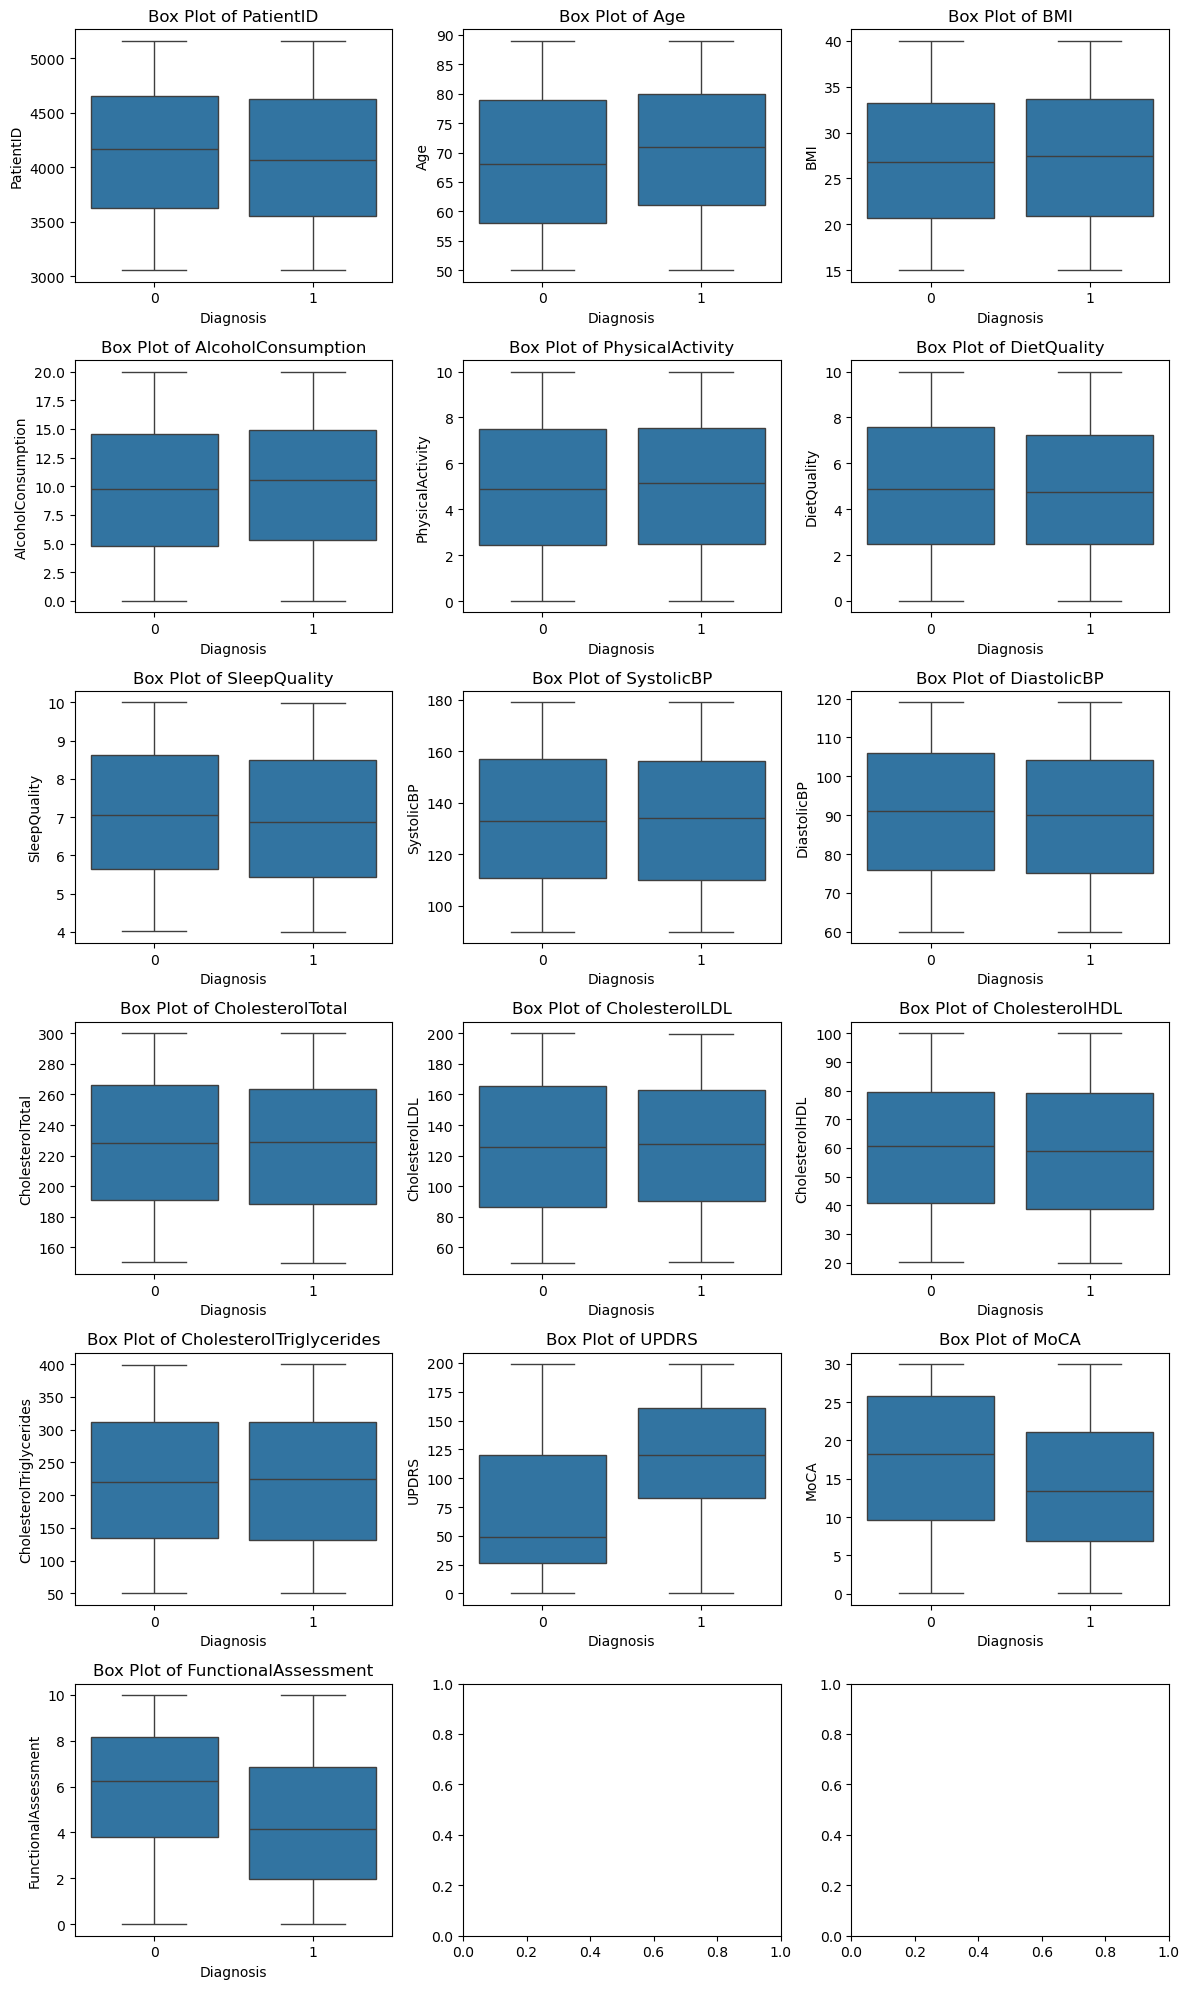

In [15]:
#  Show a box plot of continous variables with and without a parkinsons diagnosis.
plot_columns = 3
plot_rows = math.ceil(len(cont_columns) / plot_columns) 
print(plot_rows, plot_columns)
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cont_columns):
    # df_count = df_continuous.groupby('Diagnosis').agg({col: 'count'}).reset_index()
    sns.boxplot(x='Diagnosis', y=col, data=df_continuous, ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

6 3


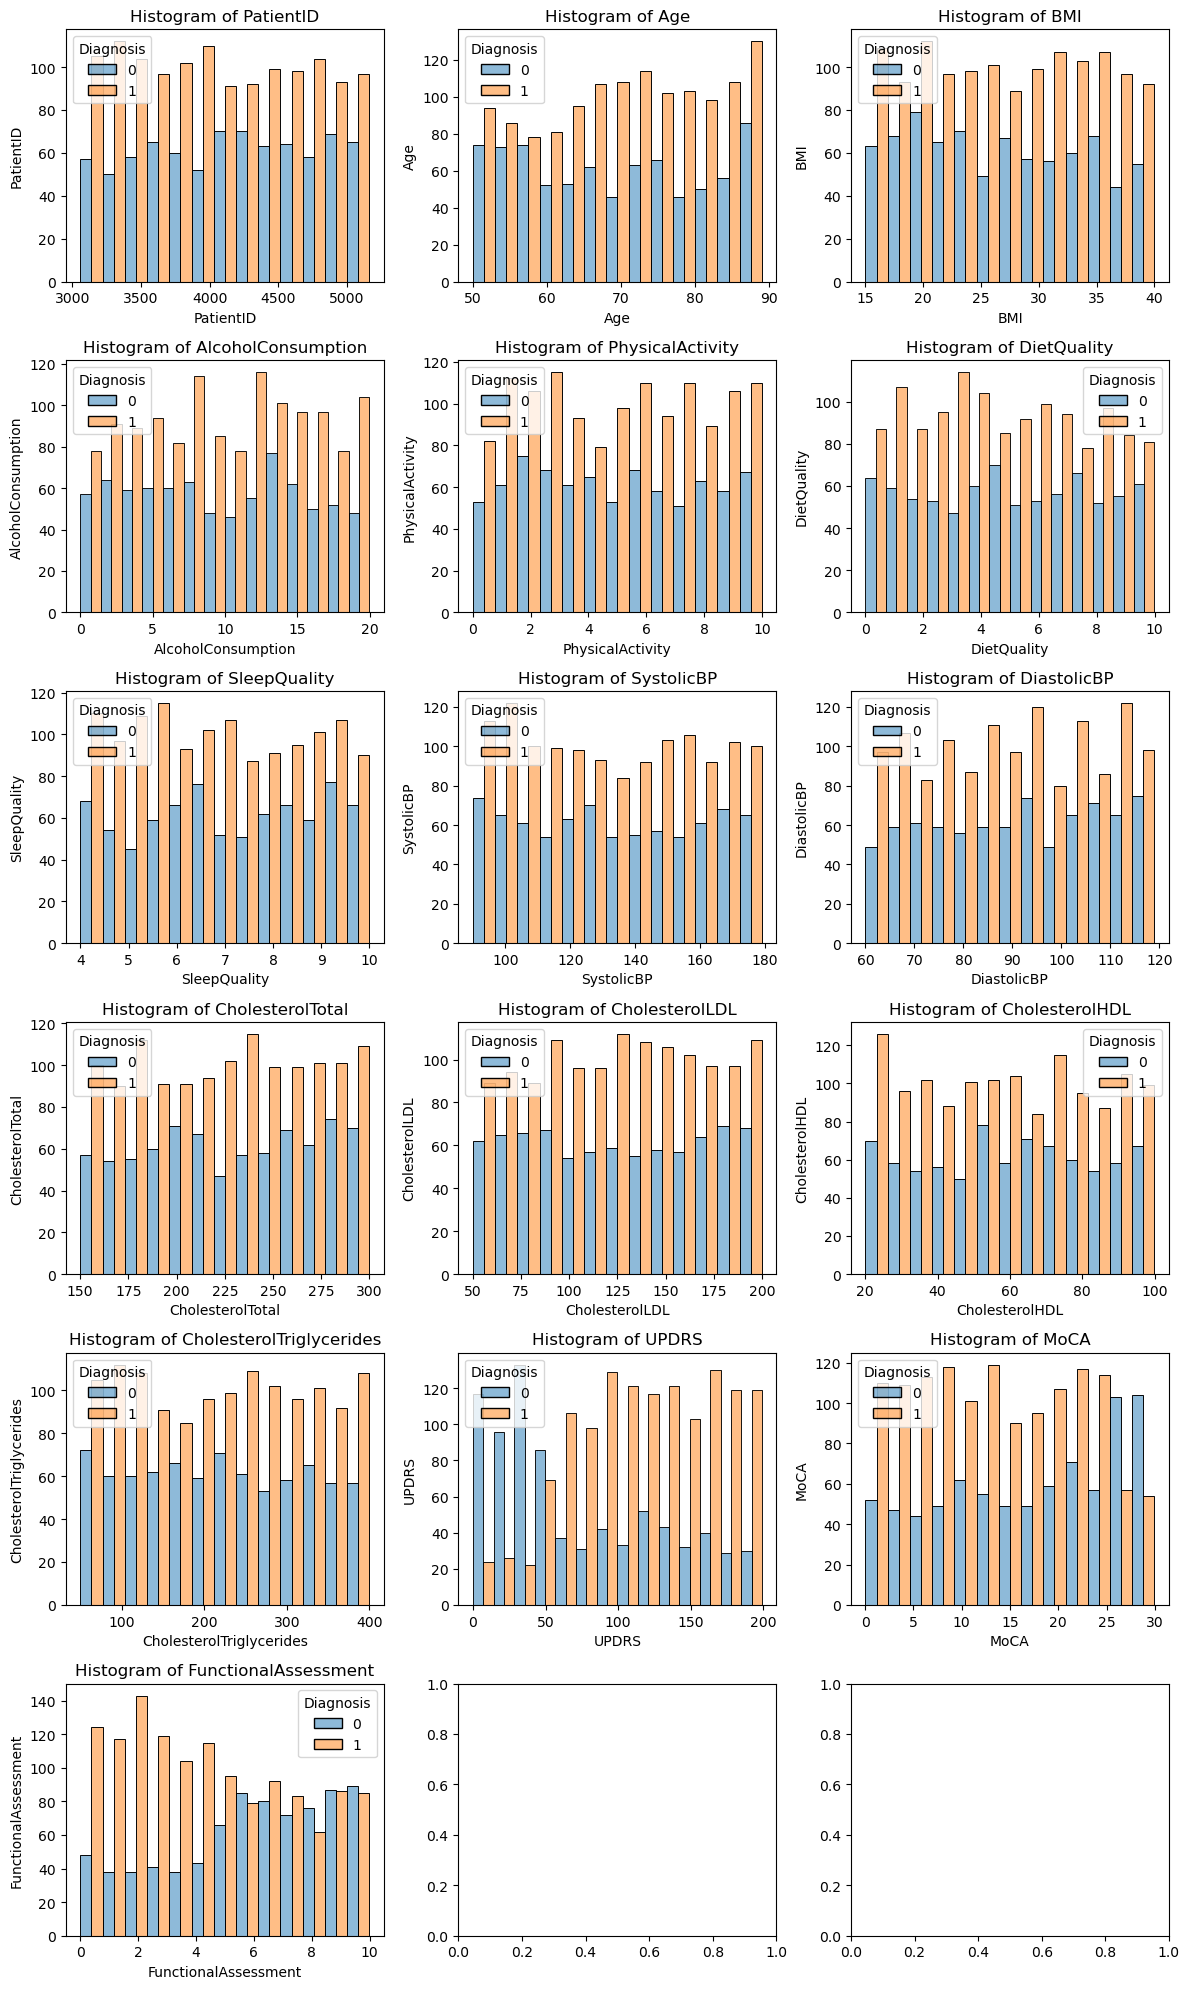

In [16]:
#  Create a histogram of each feature categorized by diagnosis
plot_columns = 3
plot_rows = math.ceil(len(cont_columns) / plot_columns) 
print(plot_rows, plot_columns) 
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cont_columns):
    sns.histplot(x=col, hue='Diagnosis',  data=df_parkinsons, ax=axs[i], multiple='dodge', alpha=0.5)
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

####  The following variables seem to show a clear correlation with a Parkinsons Diagnosis:
-  UPDRS:  Unified Parkinsons Disease Rating Scale
-  MCoA:  Montreal Cognitive Assessment
-  Functional Assessment
-  Check the correlation and p_values for these variables

In [17]:
#  For continous variables, what is the correlation to parkinsons?  For this, we will use the 
y_col = 'Diagnosis'
x_vars, y_vars, corr_coefs, p_vals = [], [], [], []
for col in cont_columns:
    x_vars.append(col)
    y_vars.append('Positive_Diagnosis')
    coef, p_val = pointbiserialr(df_parkinsons[col], df_parkinsons[y_col])
    corr_coefs.append(coef)
    p_vals.append(p_val)
df_corr_p_val = pd.DataFrame({'x_variable': x_vars, 'y_variable':y_vars, 'correlation_coef': corr_coefs, 'p_value': p_vals}).sort_values('p_value', ascending=True)
df_corr_p_val

,x_variable,y_variable,correlation_coef,p_value
13,UPDRS,Positive_Diagnosis,0.3980,7.6427e-81
15,FunctionalAssessment,Positive_Diagnosis,-0.2250,1.4207e-25
14,MoCA,Positive_Diagnosis,-0.1731,1.2668e-15
1,Age,Positive_Diagnosis,0.0653,2.7049e-03
0,PatientID,Positive_Diagnosis,-0.0435,4.5943e-02
6,SleepQuality,Positive_Diagnosis,-0.0433,4.7016e-02
3,AlcoholConsumption,Positive_Diagnosis,0.0367,9.2313e-02
2,BMI,Positive_Diagnosis,0.0301,1.6724e-01
8,DiastolicBP,Positive_Diagnosis,-0.0291,1.8239e-01
5,DietQuality,Positive_Diagnosis,-0.0230,2.9170e-01


In [18]:
filter = (np.abs(df_corr_p_val['correlation_coef']) > 0.10) & (df_corr_p_val['p_value'] < 0.01) 
df_corr_p_val[filter]
corr_cols = list(df_corr_p_val[filter].x_variable)
corr_cols

['UPDRS', 'FunctionalAssessment', 'MoCA']

6 3


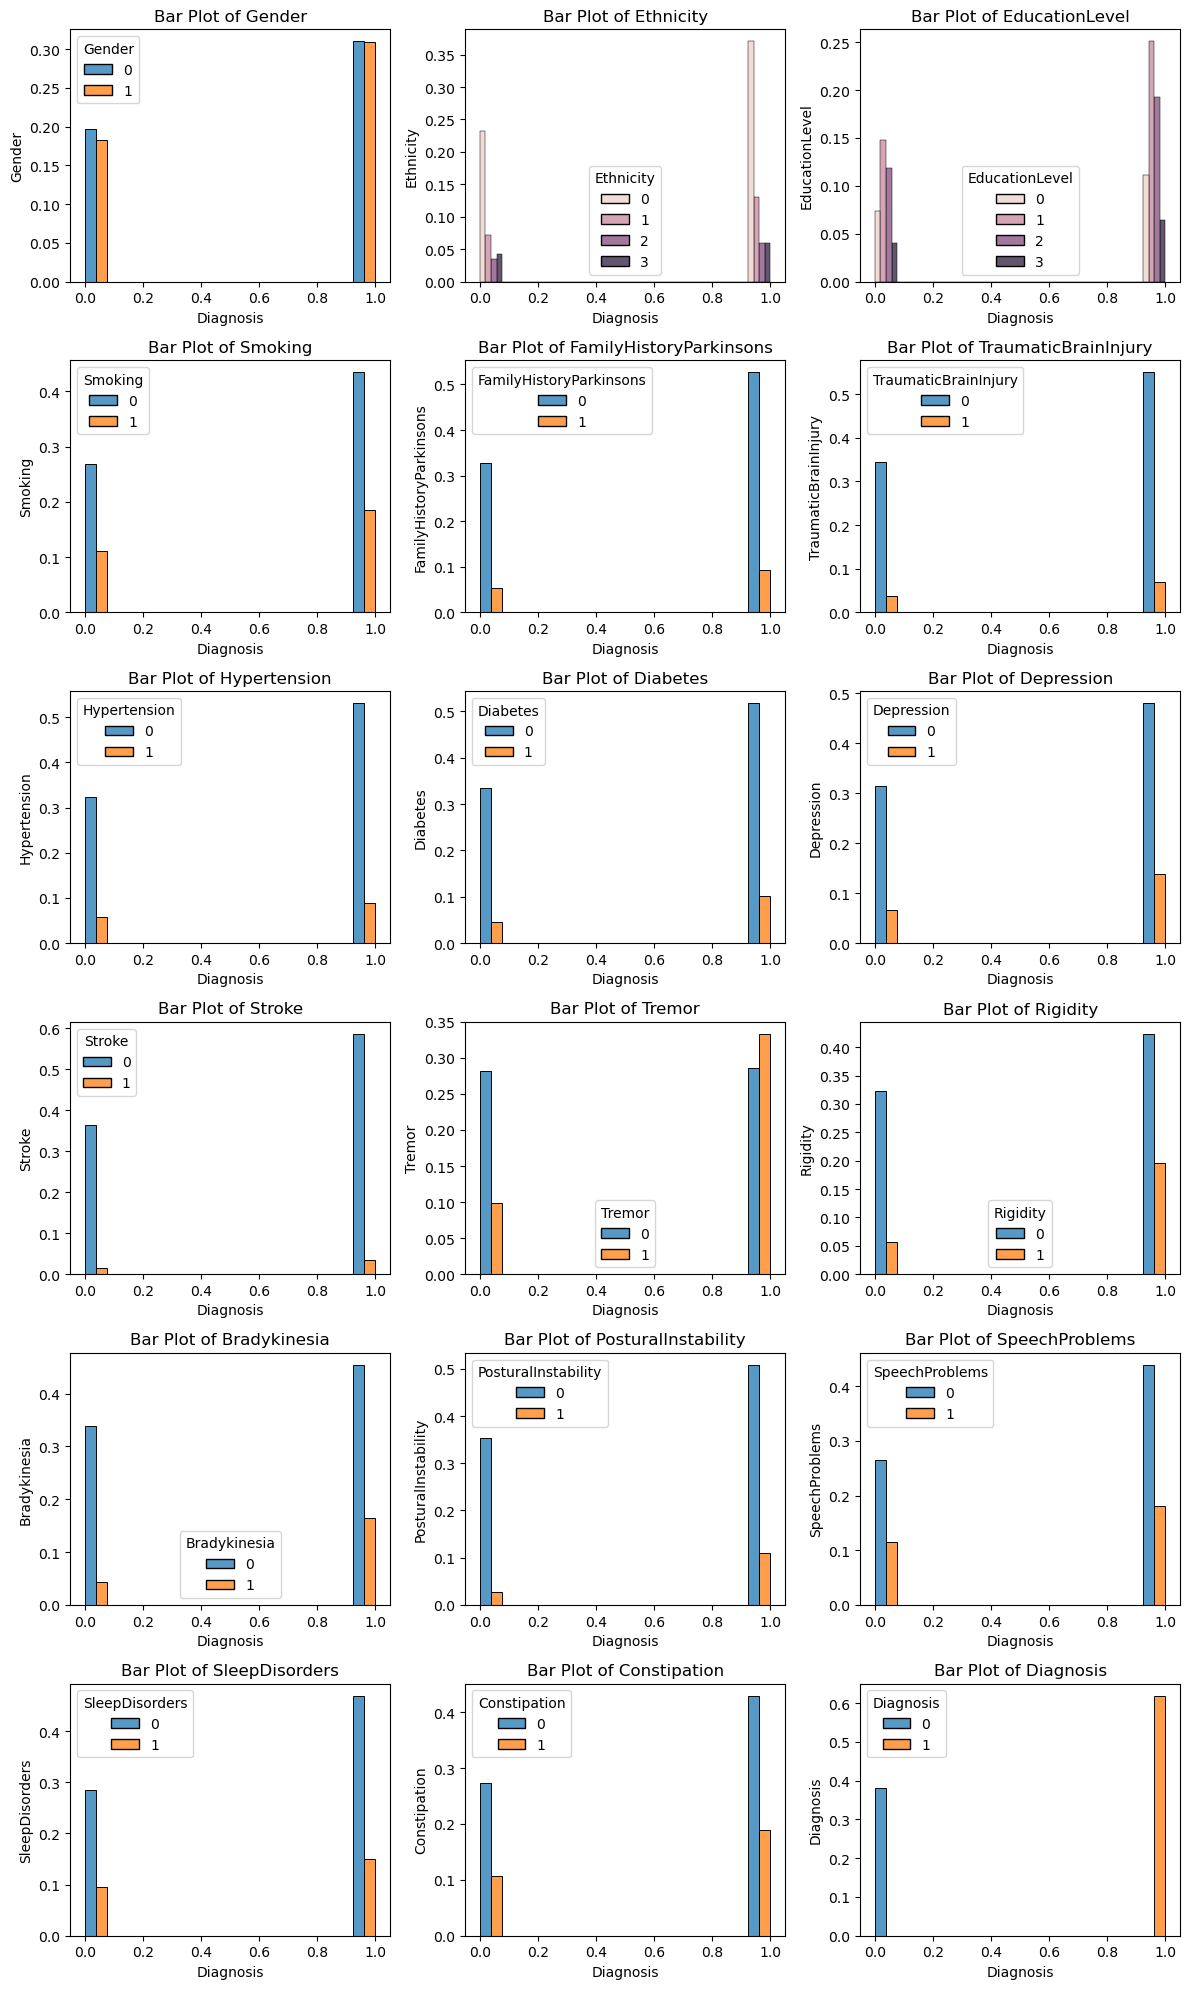

In [19]:
#  Box plot of variables
plot_columns = 3
plot_rows = math.ceil(len(cat_columns) / plot_columns) 
print(plot_rows, plot_columns)
fig, axs = plt.subplots(plot_rows, plot_columns, figsize = (12,20))
axs = axs.flatten() #  turns the 2D array of axes into a 1D list, which makes iterating through them easier.

for i, col in enumerate(cat_columns):
    sns.histplot(x='Diagnosis', hue=col, stat='proportion', multiple='dodge', data=df_parkinsons, ax=axs[i])
    axs[i].set_title(f'Bar Plot of {col}')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [20]:
#  For categorical variables, what is the correlation to parkinsons?  For this, we will use the 
y_col = 'Diagnosis'
x_vars, y_vars, corr_coefs, p_vals = [], [], [], []
for col in cat_columns[:-1]:
    x_vars.append(col)
    y_vars.append('Positive_Diagnosis')
    coef, p_val = pointbiserialr(df_parkinsons[col], df_parkinsons[y_col])
    corr_coefs.append(coef)
    p_vals.append(p_val)
df_corr_p_val = pd.DataFrame({'x_variable': x_vars, 'y_variable':y_vars, 'correlation_coef': corr_coefs, 'p_value': p_vals}).sort_values('p_value', ascending=True)
df_corr_p_val

,x_variable,y_variable,correlation_coef,p_value
10,Tremor,Positive_Diagnosis,0.2744,1.1482e-37
11,Rigidity,Positive_Diagnosis,0.1856,9.0407e-18
12,Bradykinesia,Positive_Diagnosis,0.1840,1.7143e-17
13,PosturalInstability,Positive_Diagnosis,0.1475,1.0357e-11
8,Depression,Positive_Diagnosis,0.0591,6.7003e-03
7,Diabetes,Positive_Diagnosis,0.0571,8.8235e-03
9,Stroke,Positive_Diagnosis,0.0281,1.9760e-01
16,Constipation,Positive_Diagnosis,0.0253,2.4543e-01
5,TraumaticBrainInjury,Positive_Diagnosis,0.0230,2.9230e-01
0,Gender,Positive_Diagnosis,0.0168,4.4012e-01


In [21]:
filter = (np.abs(df_corr_p_val['correlation_coef']) > 0.10) & (df_corr_p_val['p_value'] < 0.01) 
df_corr_p_val[filter]
corr_colsb = list(df_corr_p_val[filter].x_variable)
corr_colsb

['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability']

In [22]:
corr_cols.extend(corr_colsb)

In [23]:
#  Set up miscellaneous function so I can print dataframe tables for the report or presentation.
# This function requires work.  I need to format data columns with the appropriate number of significant digits before printing.
def print_table(df, sheetname):
    filepath = '../reports/results.xlsx'
    if os.path.exists(filepath):
        with pd.ExcelWriter(filepath, mode='a', engine='openpyxl', if_sheet_exists='new') as writer:
            # Write DataFrame to a new sheet
            df.to_excel(writer, sheet_name=sheetname, index=False,  float_format="%.3f")
    else:
        with pd.ExcelWriter(filepath, mode='w', engine='openpyxl',) as writer:
            # Write DataFrame to a new sheet
            df.to_excel(writer, sheet_name=sheetname, index=False, float_format="%.3f")


In [24]:
filepath = '../data/interim/interim_data.csv'
df_parkinsons.to_csv(filepath, index=False )

In [25]:
corr_cols

['UPDRS',
 'FunctionalAssessment',
 'MoCA',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability']

## 5. Feature Engineering <a class="anchor" id="section-5"></a>

In [26]:
#  Determine the feature columns with the maximum correlation and lowest p_value
X = df_parkinsons[corr_cols]
y = df_parkinsons['Diagnosis']

####  Create training and testing data sets and scale the feature variables in the data using standard scalar.

In [27]:
#  Create a training and testing set and transform the data using StandardScaler  This prevents data leakage (test data leaking into training the model.)
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

## 6. Modeling and Evaluation <a class="anchor" id="section-6"></a>

In [28]:
#  plot a confusion matrix when given the actual y_test and Y_predicted
def plot_confusion_matrix(y_test, y_predict):
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_predict)
    #  plot confusion matrix
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    # Step 3: Add labels, title, and axis names
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Step 4: Show the plot
    plt.show()

###  Logistic Regression Model
###  Logistic Regression has the following attributes and algorithm summary:
#### Attributes and Advantages:
-  Predicts a binary categorical variable.
-  Feature variables can be continuous or categorical.
-  Can predict the probability of the prediction belonging to a certain class.
-  Useful when we want to know the impact of a feature on teh target categorical variable.
#### Algorithm Summary:
-  Parameters are initialized randomly.
-  Feed the cost function with the training set and calculate the error.
-  Calculate the gradient of the cost function.
-  Update the weights on the new values.
-  Repeat process until cost is within threshold.
-  Predict the target variable and probability.


In [29]:
log_regr_model = LogisticRegression()
log_regr_model.fit(X_train_scaled, y_train)
y_predict = log_regr_model.predict(X_test_scaled)

In [30]:
#  Evaluate model accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


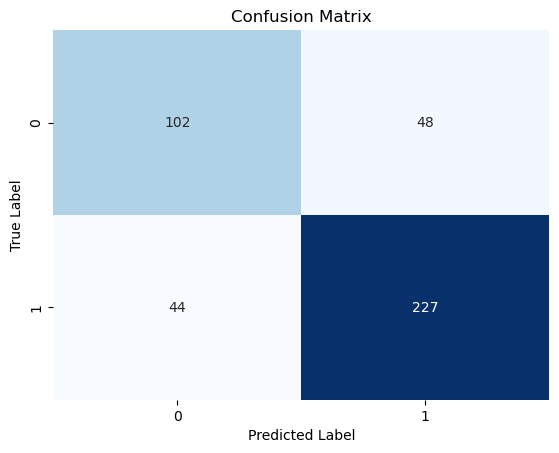

In [31]:
plot_confusion_matrix(y_test, y_predict)

In [32]:
# Classification report
class_report = classification_report(y_test, y_predict)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       150
           1       0.83      0.84      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.76      0.76       421
weighted avg       0.78      0.78      0.78       421



####  Use GridSearch to tune the hyperparameters

In [33]:
# Create the logistic regression model
log_regr_model_grid = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],  # Based on penalty choice
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(log_regr_model_grid, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'class_weight': None, 'max_iter': 100, 'solver': 'liblinear'}
Best accuracy:  0.8212590080542602


In [34]:
y_predict_grid = grid_search.predict(X_test_scaled)
#  Evaluate model accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_predict_grid)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7815


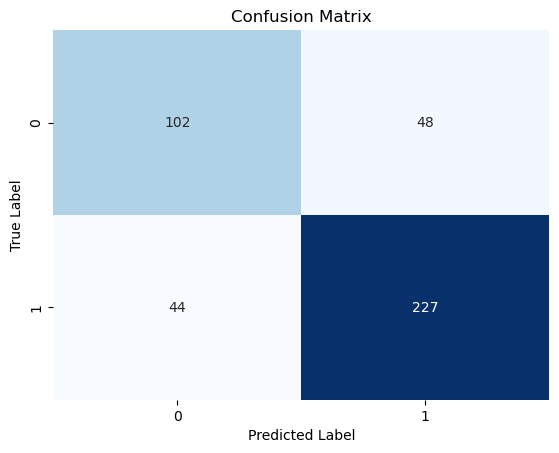

In [35]:
plot_confusion_matrix(y_test, y_predict_grid)

In [36]:
# Classification report
class_report = classification_report(y_test, y_predict_grid)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       150
           1       0.83      0.84      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.76      0.76       421
weighted avg       0.78      0.78      0.78       421



###  Support Vector Machine (SVM) Model
###  SVM has the following attributes and algorithm summary:
#### Attributes and Advantages:
-  Classifies cases by finding a separator

-  Prone to overfitting if the number of features >> samples
-  Not efficient for large datasets.
#### Algorithm Summary:
-  Transforms the data so that you can separate the target classes
-  The algorithm is looking for a hyperplane that maximizes the margin or separation between classes.


In [37]:
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train)
y_predict_svm = svm_model.predict(X_test_scaled)

In [38]:
#  Evaluate model accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_predict_svm)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


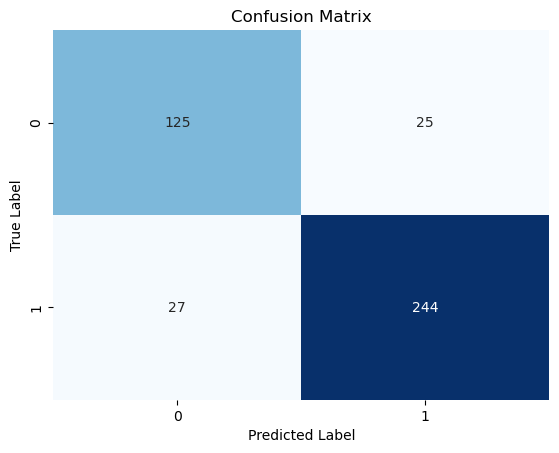

In [39]:
plot_confusion_matrix(y_test, y_predict_svm)

In [40]:
# Classification report
class_report = classification_report(y_test, y_predict_svm)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       150
           1       0.91      0.90      0.90       271

    accuracy                           0.88       421
   macro avg       0.86      0.87      0.87       421
weighted avg       0.88      0.88      0.88       421



### Desicision Tree Classifier

####  Algorithm Description
- A decision tree classifier starts by finding the feature variable which has the most effective means of predicting the class of the target variable.
- The goal of building the decision tree is to find the feature that when branched, results in the most "information gain"
- Entropy is the measure of disorder after a branch from a node.  Entropy is based on the frequency distribution of attributes in a node.
- Information gain then measures the difference in entropy before and after splitting.  The goal is for Entropy to decrease after a split.

In [41]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)


In [42]:
y_predict_dt = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_dt)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


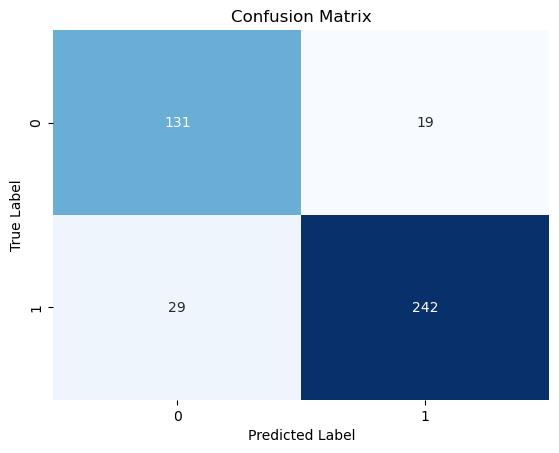

In [43]:
plot_confusion_matrix(y_test, y_predict_dt)

In [44]:
# Classification report
class_report = classification_report(y_test, y_predict_dt)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       150
           1       0.93      0.89      0.91       271

    accuracy                           0.89       421
   macro avg       0.87      0.88      0.88       421
weighted avg       0.89      0.89      0.89       421



[Text(0.46482228708791207, 0.9722222222222222, 'x[0] <= 50.003\ngini = 0.474\nsamples = 1684\nvalue = [651, 1033]'),
 Text(0.1707221350078493, 0.9166666666666666, 'x[4] <= 0.5\ngini = 0.258\nsamples = 382\nvalue = [324, 58]'),
 Text(0.31777221104788067, 0.9444444444444444, 'True  '),
 Text(0.09576138147566719, 0.8611111111111112, 'x[5] <= 0.5\ngini = 0.149\nsamples = 284\nvalue = [261, 23]'),
 Text(0.0565149136577708, 0.8055555555555556, 'x[6] <= 0.5\ngini = 0.063\nsamples = 216\nvalue = [209, 7]'),
 Text(0.03139717425431711, 0.75, 'x[2] <= 29.513\ngini = 0.022\nsamples = 183\nvalue = [181, 2]'),
 Text(0.018838304552590265, 0.6944444444444444, 'x[1] <= 0.819\ngini = 0.011\nsamples = 180\nvalue = [179, 1]'),
 Text(0.012558869701726845, 0.6388888888888888, 'x[1] <= 0.744\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.006279434850863423, 0.5833333333333334, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.018838304552590265, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalu

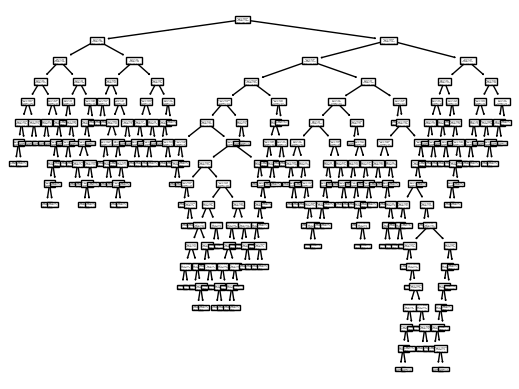

In [45]:
plot_tree(dt_clf)

### Random Forest Classifier

In [46]:
rf_class_model = RandomForestClassifier(n_estimators=10)
rf_class_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [47]:
y_predict_rf = rf_class_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_rf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


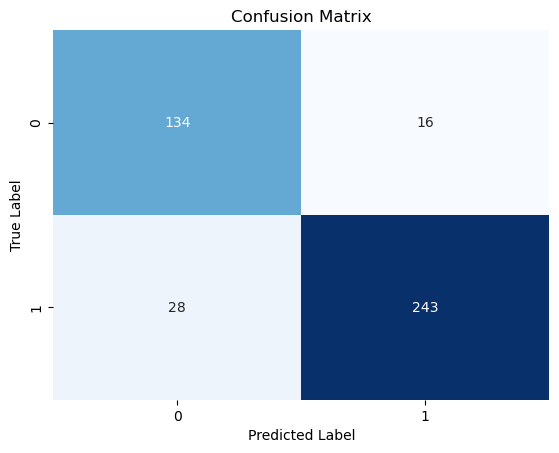

In [48]:
plot_confusion_matrix(y_test, y_predict_rf)

In [49]:
# Classification report
class_report = classification_report(y_test, y_predict_rf)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       150
           1       0.94      0.90      0.92       271

    accuracy                           0.90       421
   macro avg       0.88      0.90      0.89       421
weighted avg       0.90      0.90      0.90       421



## 7. Findings and Conclusions <a class="anchor" id="section-7"></a>

### Results:
-  Feature variables were selected based on correlation > 0.1 and p-values less than 0.01.
-  This resulted in feature variables of 'UPDRS',  'FunctionalAssessment'
 'MoCA 
 'Tremo ,
 'Rigidi ',
 'Bradykine a',
 'PosturalInstab.ility'
-  The random forest model produced the highest recall, which is useful for postively identifying Parkinsons Disease patients with PD.
-  SVM was equally good on recall but was lower on precision, the high percentage of True positive predictions relative to positive predictions.

### Thoughts on Future Work and Next Steps:
-  Review kaggle user modeling to see if I can improve the accuracy of the models
-  Research what other data may be available to predict parkinsons diagnosis more accurately.

###  Acknowledgements:
-  This work relies on data provided by Kaggle user Rabieel Kharoua which is appreciated.
-  
https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/data
